**FILA A**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
df

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


1. Visualizzare la popolazione complessiva di tutte le regioni

In [ ]:
df['totale_popolazione'].sum()

54009944

2. Visualizzare la popolazione di una regione inserita dall’utente. Controllare il dato inserito: se la regione
non esiste dare un opportuno messaggio, altrimenti dare il messaggio “La regione &lt;nome&gt; ha &lt;totale&gt;
abitanti”

In [ ]:
regione = input()
popolazione =df[df['nome_area']== regione].totale_popolazione.sum()
if popolazione > 0:
  print('la regione',regione,'ha',popolazione,'abitanti')
else:
  print('la regione non esiste')

Lombardia
la regione Lombardia ha 9246804 abitanti


3. Visualizzare la popolazione di ogni regione. Visualizzare il nome della regione e il numero di abitanti.
Ordinare in ordine decrescente sul numero di abitanti (dalla regione che ha più abitanti a quella che ne
ha di meno)

In [ ]:
df1 = df.groupby('nome_area',as_index=False)[['totale_popolazione']].sum().sort_values(by='totale_popolazione',ascending=False)


4. Visualizzare il grafico a barre orizzontali relativo all’esercizio 3. Inserire il titolo, i nomi degli assi e la
legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.

<BarContainer object of 21 artists>

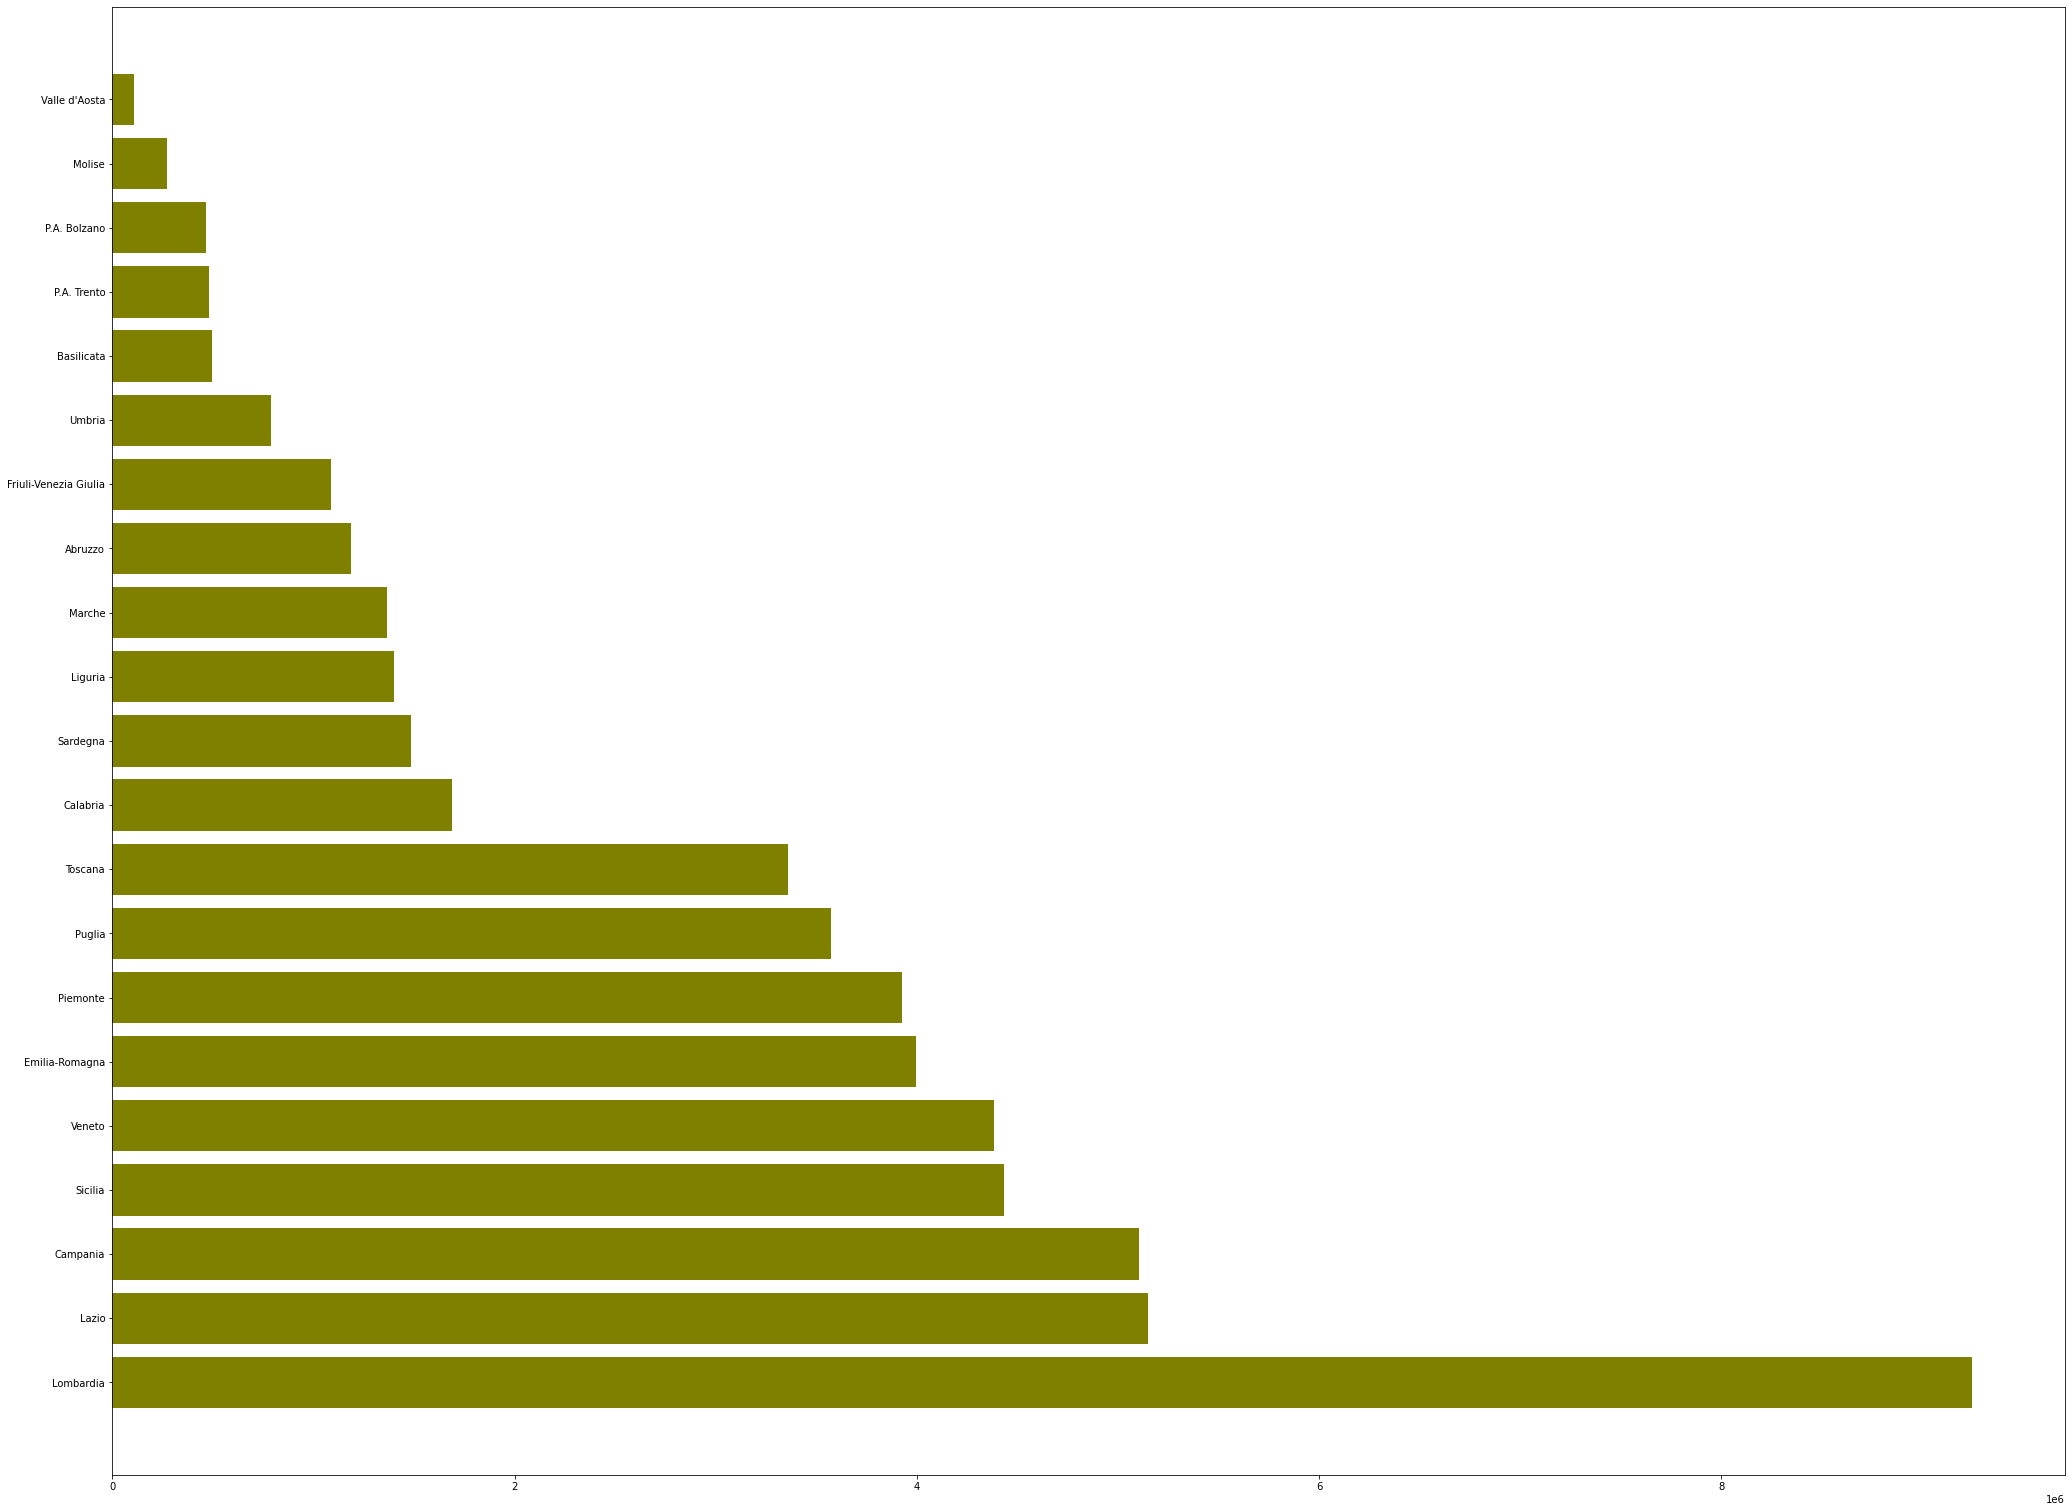

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.barh(df1['nome_area'],df1['totale_popolazione'],color='olive')

Eliminare la colonna ‘area’

In [ ]:
df.drop(columns='area',inplace=True)
df

6. Visualizzare le fasce anagrafiche che hanno un numero di persone compreso tra 5 e 7 milioni

In [ ]:
df1=df.groupby('fascia_anagrafica')[['totale_popolazione']].sum().reset_index()
df2 = df1.loc[(df1['totale_popolazione'] <= 7000000 ) & (df1['totale_popolazione'] >=5000000),['fascia_anagrafica','totale_popolazione']]
df2

,fascia_anagrafica,totale_popolazione
1,20-29,6013709
2,30-39,6794332
6,70-79,6019293


7. Visualizzare il grafico a torta dei dati dell’esercizio 6. Visualizzare negli spicchi sia il numero assoluto
degli abitanti (ad esempio 4345767) sia la percentuale

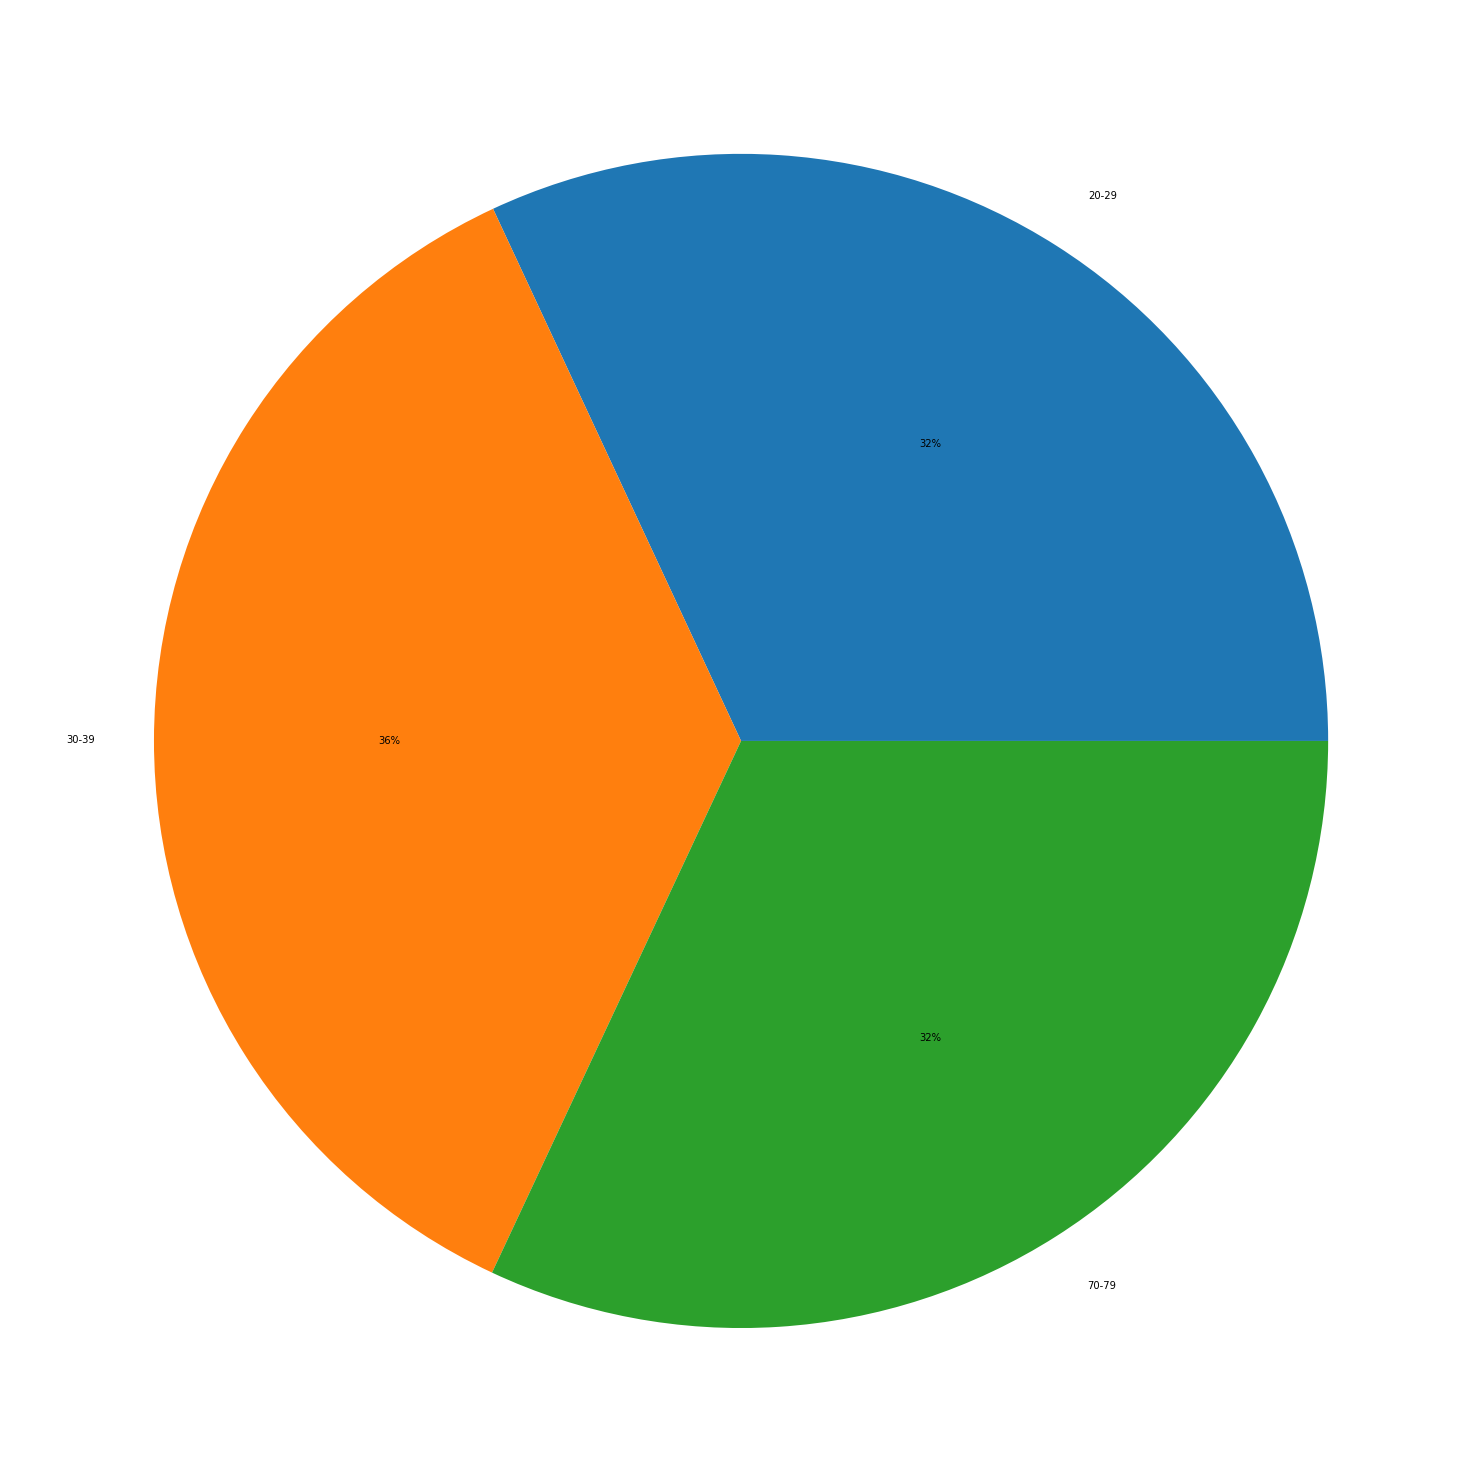

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.pie(df2['totale_popolazione'],labels=df2['fascia_anagrafica'],autopct='%1.0f%%')
plt.show()

8. Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due colonne e tre
righe e deve contenere nella prima colonna tre volte il grafico a barre e nelle seconda colonna tre volte
il grafico a torta

KeyError: ignored

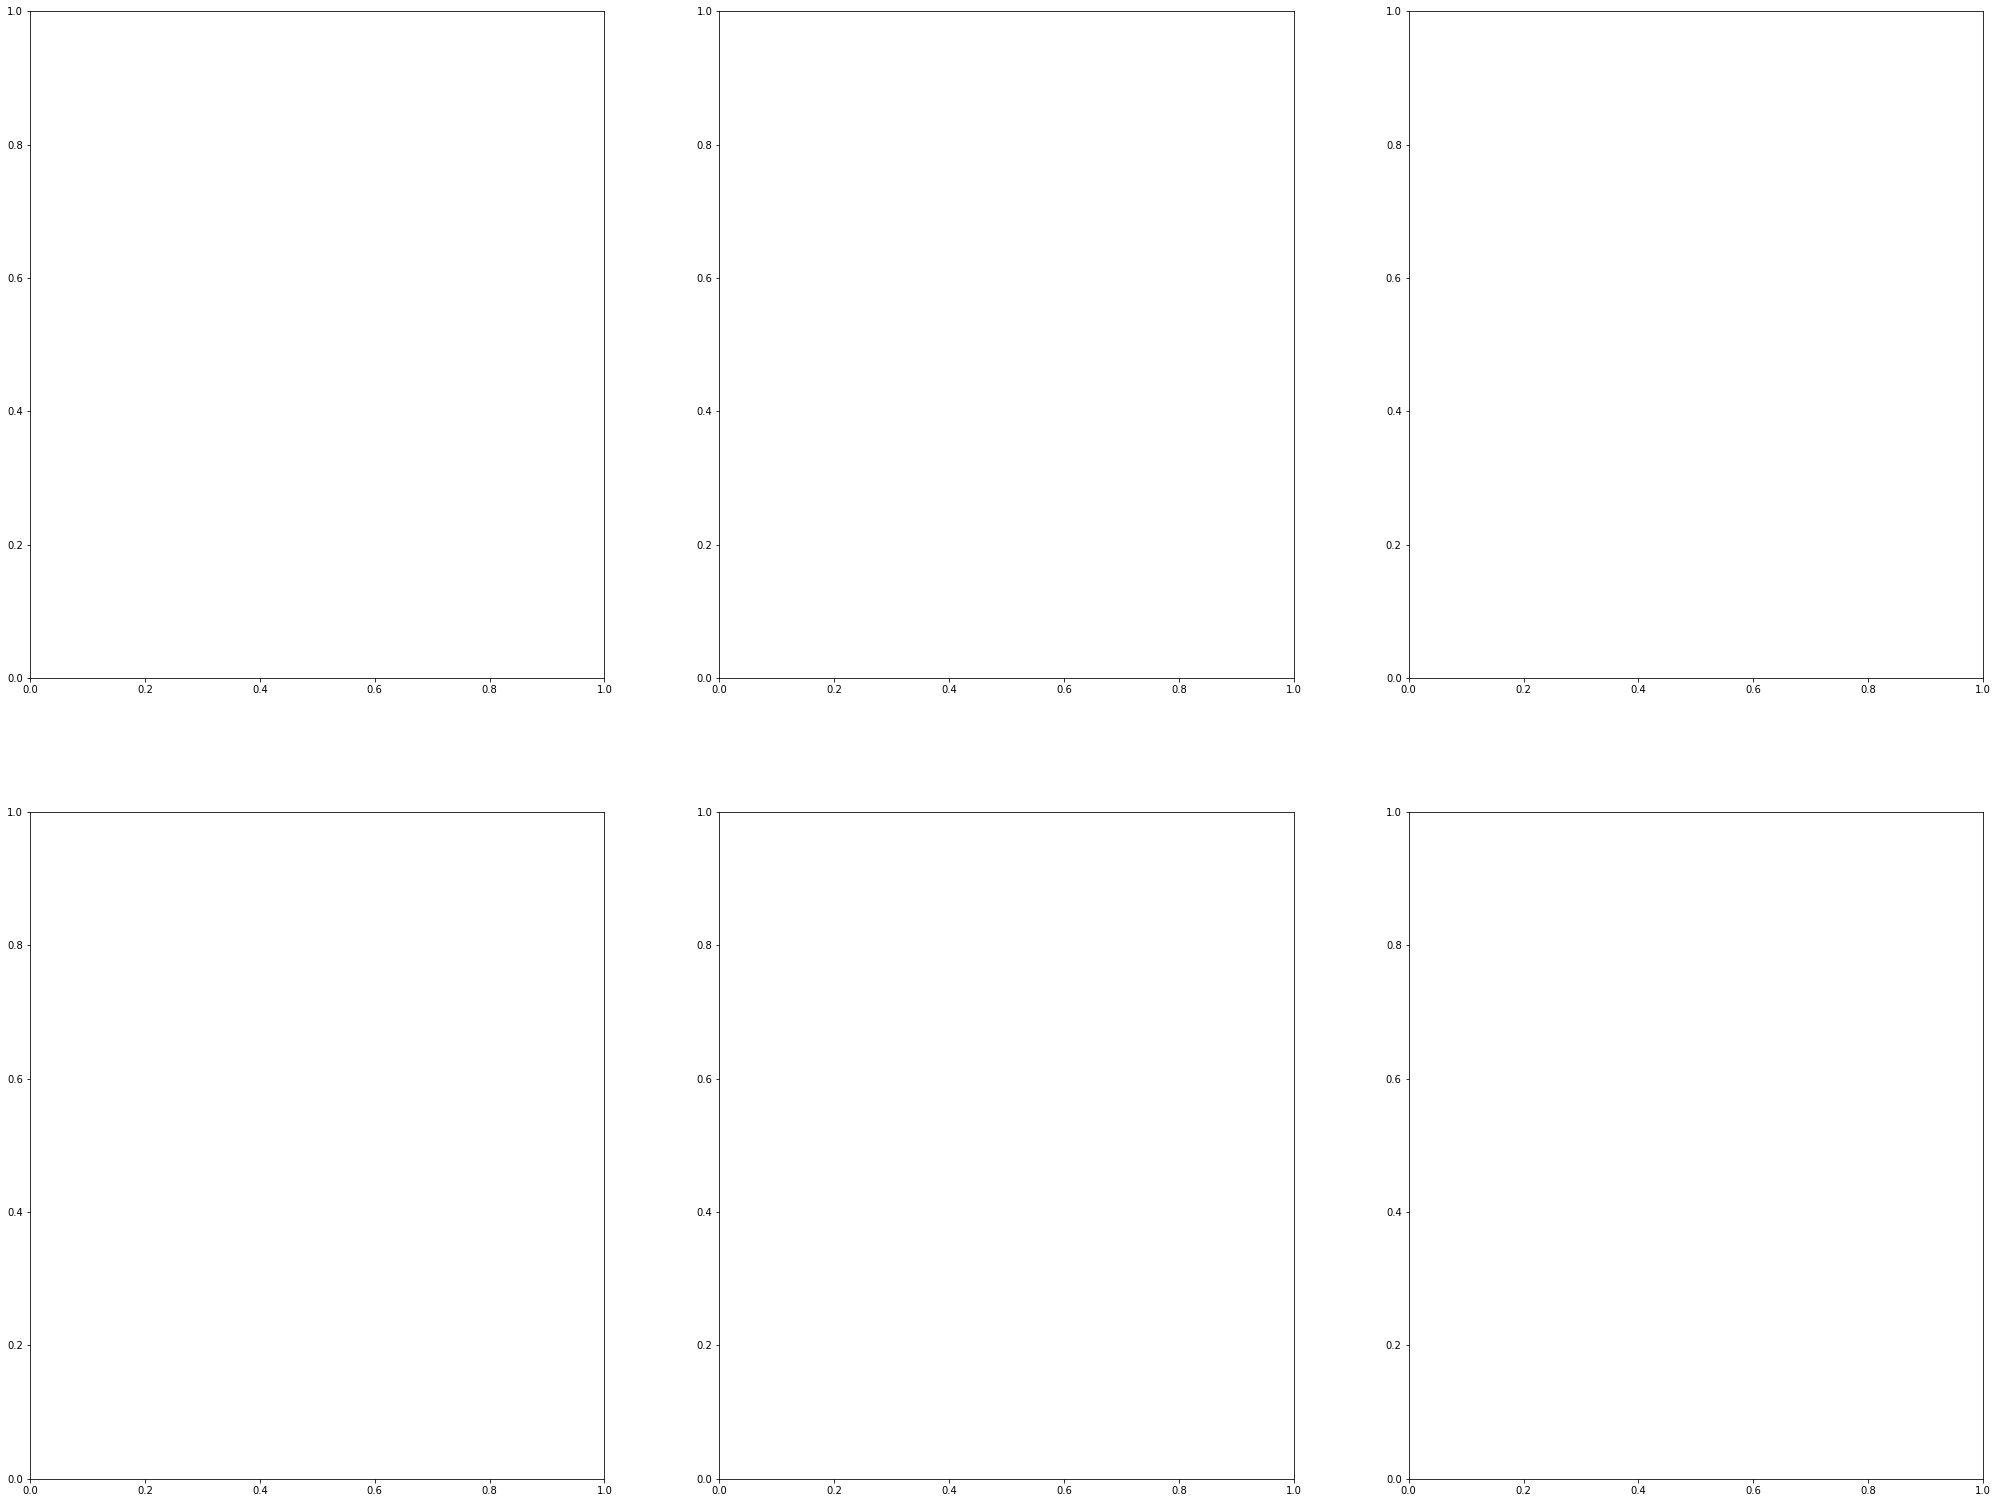

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
ax1.barh(df1['nome_area'],df1['totale_popolazione'],color='olive')
ax2.barh(df1['nome_area'],df1['totale_popolazione'],color='olive')
ax3.barh(df1['nome_area'],df1['totale_popolazione'],color='olive')

ax4.pie(df2['totale_popolazione'],labels=df2['fascia_anagrafica'],autopct='%1.0f%%')
ax5.pie(df2['totale_popolazione'],labels=df2['fascia_anagrafica'],autopct='%1.0f%%')
ax6.pie(df2['totale_popolazione'],labels=df2['fascia_anagrafica'],autopct='%1.0f%%')
plt.rcParams["figure.figsize"] = (35,27)
plt.show()

9. Salvare il grafico in un file .png

**FILA B**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv')
df

1. Eliminare tutte le colonne ad eccezione della provincia, del comune, del presidio ospedaliero e del
nome_area

In [ ]:
df.filter(['nome_area','presidio_ospedaliero','comune','provincia'])

*2*.eliminare i dati nulli

In [ ]:
df.dropna(inplace=True)

3. Visualizzare i punti vaccinali di un comune inserito dall’utente. Controllare il dato inserito: se il comune
non esiste dare un opportuno messaggio, altrimenti visualizzare i nomi dei punti vaccinali

In [ ]:
user_input = input('Inserisci nome di un comune: ')
n = df['comune'].str.contains(user_input).sum()

if n > 0:
  print("il comune ",user_input,df.loc[df['comune'] == user_input, 'presidio_ospedaliero'])
else:
  print('il comune inserita non esiste')



vaccinali di ogni regione. Visualizzare il nome della regione e il numero di
punti vaccinali. Ordinare in ordine decrescente sul numero di punti vaccinali (dalla regione che ha più
punti vaccinali a quella che ne ha di meno)

In [ ]:
df1 = df.groupby('nome_area',as_index=False)[['presidio_ospedaliero']].count().sort_values(by='presidio_ospedaliero',ascending=False)
df1

5. Visualizzare il grafico a barre orizzontali relativo all’esercizio 4. Inserire il titolo, i nomi degli assi e la
legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.

In [ ]:
5. Visualizzare il grafico a barre orizzontali relativo all’esercizio 4. Inserire il titolo, i nomi degli assi e la
legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.

6. Visualizzare il numero di province per ogni regione

In [ ]:
df2=df.groupby('nome_area',as_index=False)['provincia'].count()
df2

7. Visualizzare il grafico a torta dei dati dell’esercizio precedente. Inserire il titolo e la legenda

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.pie(df2['provincia'],labels=df2['nome_area'],autopct='%1.0f%%')
plt.show()

8. Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due righe e tre
colonne e deve contenere nella prima riga tre volte il grafico a barre e nella seconda riga tre volte il
grafico a torta

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
ax1.barh(df1['nome_area'],df1['presidio_ospedaliero'],color='olive')
ax2.barh(df1['nome_area'],df1['presidio_ospedaliero'],color='olive')
ax3.barh(df1['nome_area'],df1['presidio_ospedaliero'],color='olive')

ax4.pie(df2['provincia'], labels=df2['nome_area'], autopct='%1.0f%%')
ax5.pie(df2['provincia'], labels=df2['nome_area'], autopct='%1.0f%%')
ax6.pie(df2['provincia'], labels=df2['nome_area'], autopct='%1.0f%%')
plt.rcParams["figure.figsize"] = (35,27)
plt.show()

9. Salvare il grafico in un file .png

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.pie(df2['provincia'],labels=df2['nome_area'],autopct='%1.0f%%')
plt.show()
fig.savefig('oboss.png')